In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## K Nearest Neighbors

In [2]:
df = pd.read_csv('Classified Data', index_col='Unnamed: 0')
df.shape

(1000, 11)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


There are 11 columns in the dataset with 1000 rows. As we can see the target to predict is in column called 'TARGET CLASS'

In [4]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


No missing value here, each column has 1000 data in the count index. So we can continue to build our model.

### Using KNN to predict TARGET CLASS

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# data preparation
X = df.drop('TARGET CLASS', axis=1).values
y = df['TARGET CLASS'].values

# split train and test set using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# initiate KNeighborsClassifier object : knn
knn = KNeighborsClassifier(n_neighbors=3)

# fit the knn to train data
knn.fit(X_train, y_train)

# predict X_test : y_pred
y_pred = knn.predict(X_test)

# print y_pred
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

We built the model succesfully, now let's check the classification report and confunsion matrix for our data.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# Evaluation of the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('')
print(f'Acc = {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.94      0.93      0.93        94

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

[[100   6]
 [  7  87]]

Acc = 0.935


The model performs well. The precision of 0 is 0.93, it means when our model creates prediction that 100 data has target class of 0, the correct prediction is 93 data, only 7 data that is predicted wrong. Let's see if we can optimize our model performance by searching for the best number of neighbors.

### Finding the best n_neighbors for model

In [9]:
accuracy = []
neighbors = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    neighbors.append(item)

In [10]:
pd.DataFrame({'K': neighbors,'acc' : accuracy}).sort_values(by=['acc'], ascending=False).head()

,K,acc
30,31,0.955
15,16,0.955
26,27,0.955
28,29,0.955
33,34,0.955


16 neighbors gave the same accuracy with 27, 29, 31, and 34. 16 is the lowest number of all and that will, so we will use n_neighbors 16 as the parameter.

### Classification Report for n_neighbors = 16

In [11]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



As we can see, with n_neighbors=16, we can get better classification report than n_neighbors=3

## Scaling Data

We will use Wiconsin Breast Cancer (WBC) dataset to learn about scaling data. We will scale the data using StandardScaler. First we will build model without scale the data then build one that scale the data first so we can compare the result.

In [12]:
from sklearn.datasets import load_breast_cancer

In [13]:
# dictionary of data breast cancer : data
data = load_breast_cancer()

In [14]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
# data preparation
X = data['data']
# 0 = malignant, 1=benign
y = data['target']

### Modelling Without Standardize Feature

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_wbc = KNeighborsClassifier(n_neighbors=3)

model_wbc.fit(X_train, y_train)

y_pred = model_wbc.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



### Modelling With Standardize Feature using StandarScaler
It is good practice to use StandarScaler for KNN Model, because KNN is really sensitive to distance

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)

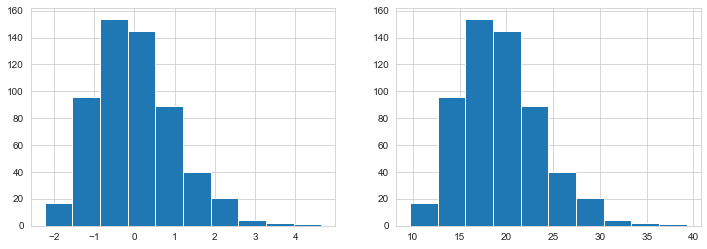

In [20]:
sns.set_style('whitegrid')
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].hist(X_scaled[:,1])
ax[1].hist(X[:,1])
plt.show()

As we can see, standard scaler not changing the distribution of the data. It only changes the scale of the data, each column doesn't have big difference in value with one another.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

model_wbc = KNeighborsClassifier(n_neighbors=3)

model_wbc.fit(X_train, y_train)

y_pred = model_wbc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Scaling our data first gave better model for KNN.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)
accuracy = []
neighbors = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    neighbors.append(item)
pd.DataFrame({'K': neighbors,'acc' : accuracy}).sort_values(by=['acc'], ascending=False).head()

,K,acc
11,12,0.982456
9,10,0.982456
13,14,0.973684
7,8,0.973684
12,13,0.973684


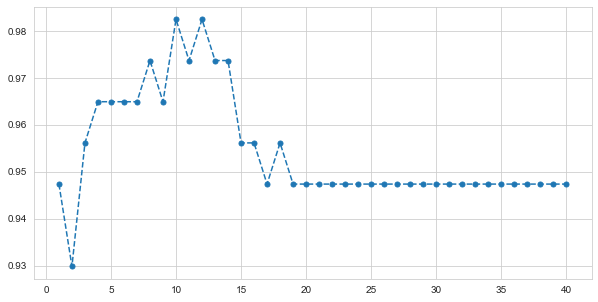

In [23]:
plt.figure(figsize=(10,5))
plt.plot(neighbors, accuracy, linestyle='dashed', marker='o', markersize=5)

The plot showed that neighbors with number of 10 gave the best result

# SVM
predicting breast cancer using SVM

In [24]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
# data preparation
X = pd.DataFrame(data['data'], columns=data['feature_names'])
# 0 = malignant, 1=benign
y = data['target']

In [26]:
df = X.copy()
df['target'] = y

In [28]:
len(df.drop('target', axis=1).columns)

30

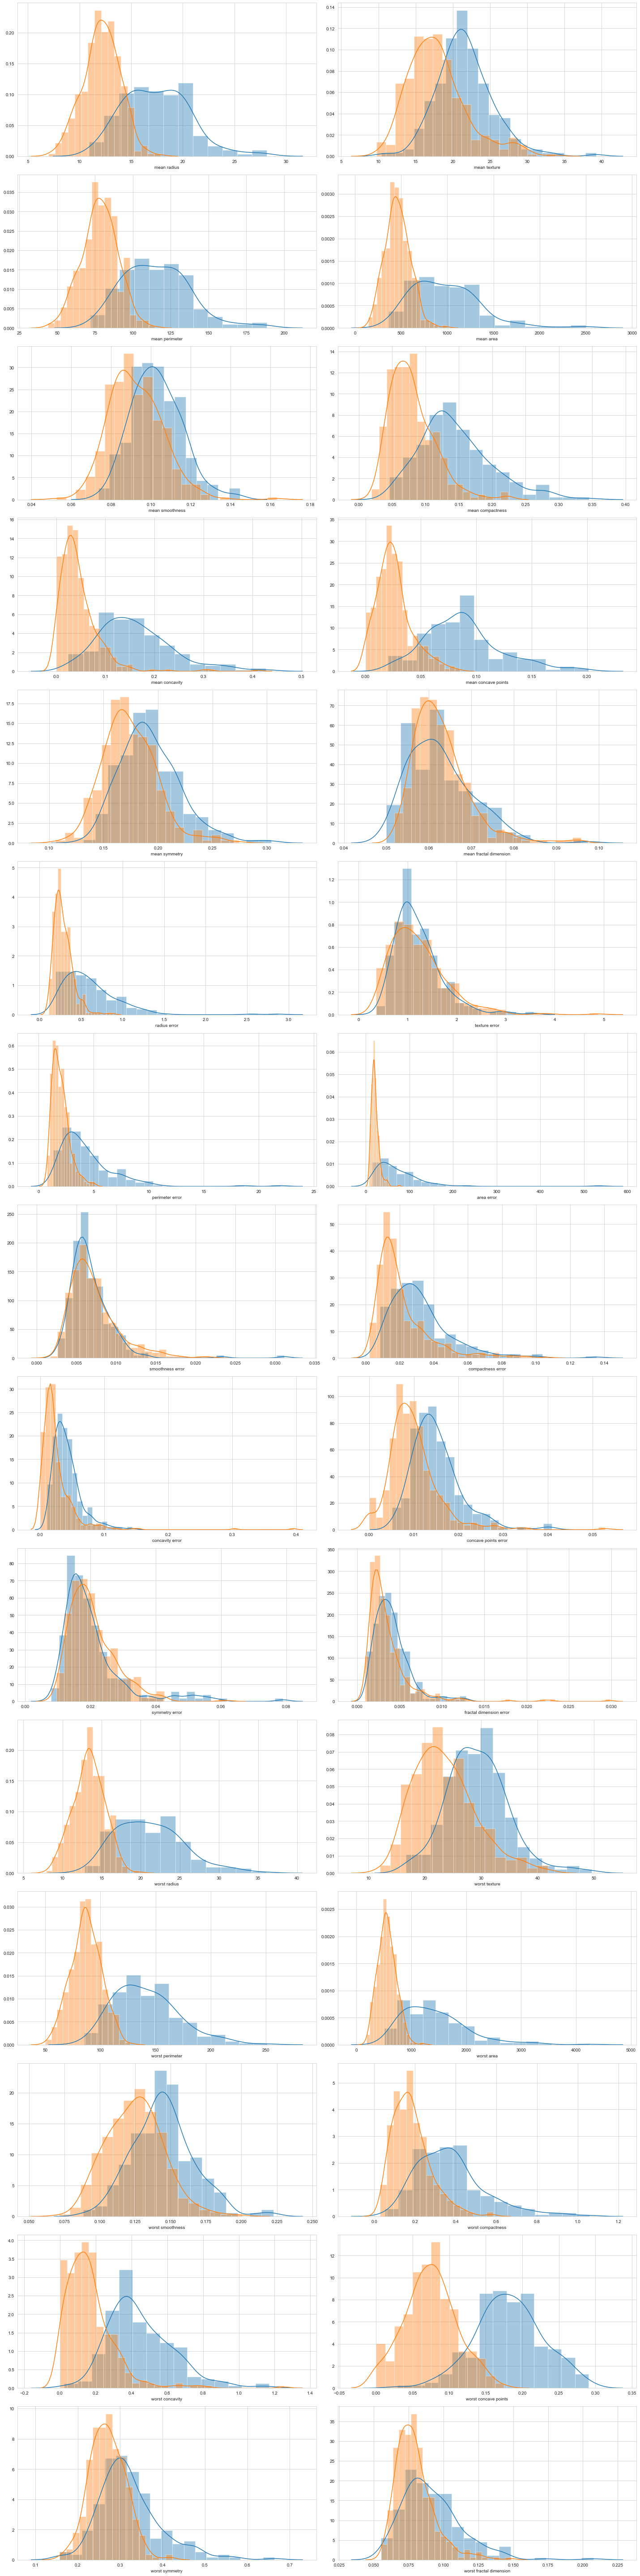

In [31]:
# i = 1
# plt.figure(figsize=(20, 80))
# for col in df.drop('target', axis=1).columns:
#     plt.subplot(15,2, i)
#     sns.distplot(df[df['target'] == 0][col])
#     sns.distplot(df[df['target'] == 1][col])
#     i += 1
# plt.tight_layout()

In [32]:
from sklearn.svm import SVC

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model was bad in predicting malignant type of cancer. We could tune the hyperparameter in GridSearchCV

### Modelling with hyperparameter for SVC

In [35]:
from sklearn.model_selection import GridSearchCV

In [34]:
param = {'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'C':[0.1, 1, 10, 100, 1000]}

In [36]:
grid = GridSearchCV(SVC(), param, cv=3, verbose=3)

In [37]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.629, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.625, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.629, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.625, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.629, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.625, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.625, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [39]:
grid.best_score_

0.9428571428571428

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = SVC(gamma=0.0001, C=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



The best parameter for the SVC model is C = 10 and gamma 0.0001. It significantly boost our model from 0.63 accuracy to 0.95 accuracy